<a href="https://colab.research.google.com/github/Thurunany/Introducao-Data-Science/blob/main/FilmeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AULA 1

In [6]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [7]:
notas.shape

(43084, 4)

In [8]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [9]:
notas['nota']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
43079    4.5
43080    3.5
43081    3.5
43082    2.5
43083    4.0
Name: nota, Length: 43084, dtype: float64

In [11]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [12]:
notas['nota'].value_counts()

4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: nota, dtype: int64

In [13]:
notas['nota'].mean()

3.5669506081143814

#AULA 2

In [16]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

#Media de notas

In [19]:
notas['nota'].median()

4.0

In [20]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

##Anlise grafica de notas

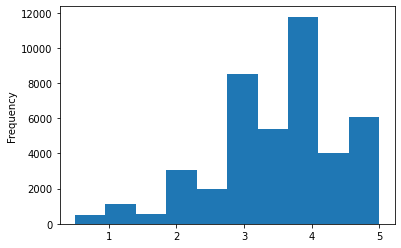

In [18]:
notas.nota.plot(kind='hist')

##Utilizando seaborn para visualizar o grafico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


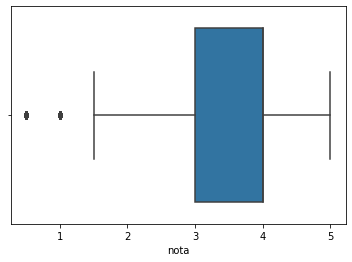

In [21]:
import seaborn as sns

sns.boxplot(notas.nota)

#AULA 3

##Olhando os filmes

In [23]:
filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##Mundando as seções para portugues

In [24]:
filmes.columns = ["filmesId", "titulo", "generos"]
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando algumas notas especificas por filme

In [27]:
notas.query("filmeId==1").nota.mean()

3.897196261682243

In [28]:
notas.query("filmeId==2").nota.mean()

3.3666666666666667

##Agrupar nota e media dos filmes

In [33]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

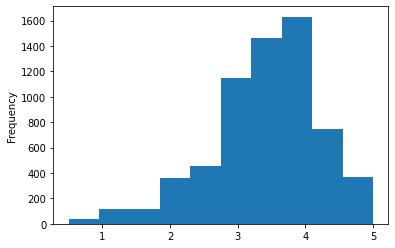

In [34]:
medias_por_filme.plot(kind='hist')

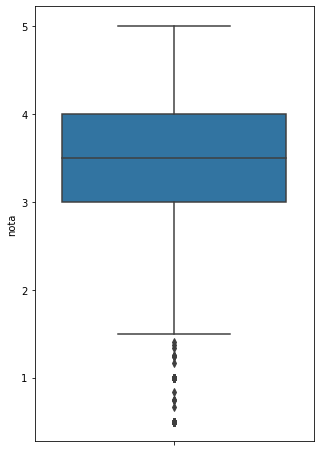

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [36]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


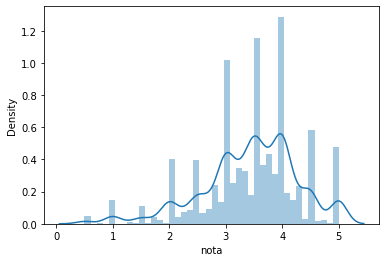

In [37]:
sns.distplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


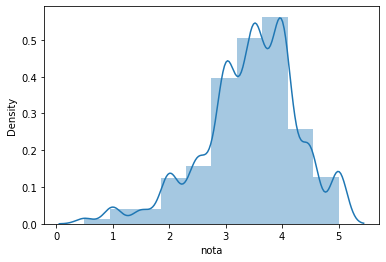

In [40]:
sns.distplot(medias_por_filme, bins=10)

##Ferramenta especifica que Panda utiliza para fazer o grafico

Text(0.5, 1.0, 'Histograma da media dos filmes')

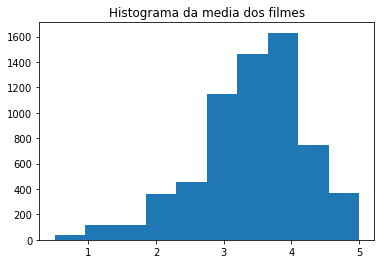

In [42]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma da media dos filmes")